In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Display defaults. I don't know why these values are used, so I won't change them for now
plt.rcParams['figure.figsize'] = (10, 10) #large images
plt.rcParams['image.interpolation'] = 'nearest' #don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray' #Use grayscale instead of color heatmap

%matplotlib inline

In [7]:
# Load caffe
import os
import caffe
caffe_root = '/opt/caffe/'
caffe_net = caffe_root + 'models/bvlc_reference_caffenet/'
if os.path.isfile(caffe_net + 'bvlc_reference_caffenet.caffemodel'):
    print 'CaffeNet found.'
else:
    print 'CaffeNet not found. We will try to continue, but you may have to install the reference model'

CaffeNet found.


In [9]:
caffe.set_mode_cpu()

model_def = caffe_net + 'deploy.prototxt'
model_weights = caffe_net + 'bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def, # Structure of the model
                model_weights, # Trained weights
                caffe.TEST) # Use test mode (don't perform dropout)

In [2]:
def detect_faces(image):
    height, width, depth = image.shape
    DOWNSCALE = 4

    classifier = cv2.CascadeClassifier('Detector_XML/haarcascade_frontalface_alt.xml')

    # Resize image for faster processing
    mini_size = (int(width/DOWNSCALE), int(height/DOWNSCALE))
    small_img = cv2.resize(image, mini_size)
    
    # detect and store faces
    faces = classifier.detectMultiScale(small_img)
    
    # Add faces to frame, if any was found
    if(len(faces) > 0):
        for face in faces:
            x, y, w, h = [ coordinate*DOWNSCALE for coordinate in face ]
            # Color in BGR instead of RGB!
            color = (0, 255, 0)
            point1 = (x, y)
            point2 = (x + w, y + h)
            cv2.rectangle(image, point1, point2, color)
    return image, faces

In [3]:
def show_image(img, title):
    plt.imshow(img[:,:,::-1])
    plt.title(title)
    plt.axis('off')

In [4]:
def read_from_webcam():
    capture = cv2.VideoCapture(0)
    while(True):
        ret, frame = capture.read()
        
        # This will be used to show the original image later
        img = frame.copy()

        # Detects and draws a rectangle around the detected faces
        frame, faces = detect_faces(frame)
        cv2.imshow('frame', frame)

        # Quit on `q` or `esc`
        pressed_key = cv2.waitKey(1) & 0xFF
        if(pressed_key == ord('q') or pressed_key == 27): #ESCape
            break
    
    capture.release()
    cv2.destroyAllWindows()
    return img, frame, faces

In [5]:
original, detection, faces = read_from_webcam()

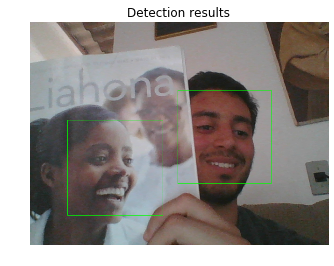

In [6]:
show_image(detection, 'Detection results')

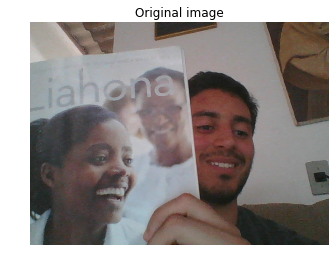

In [7]:
show_image(original, 'Original image')

In [8]:
print(faces)

[[79 37 50 50]
 [20 53 51 51]]
